In [53]:
!pip install xgboost

In [28]:
!pip install pandas numpy scikit-learn xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 640.0 kB/s eta 0:03:16
   ---------------------------------------- 0.0/124.9 MB 487.6 kB/s eta 0:04:17
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:58
   ---------------------------------------- 0.2/124.9 MB 1.3 MB/s eta 0:01:40
   ---------------------------------------- 0.3/124.9 MB 1.5 MB/s eta 0:01:24
   ---------------------------------------- 0.5/124.9 MB 1.8 MB/s eta 0:01:08
   ---------------------------------------- 0.6/124.9 MB 1.9 MB/s eta 0:01:05
   ---------------------------------------- 0.7/124.9 MB 2.1 MB/s eta 0:01:00
   ---------------------------------------- 0.9/124.9 MB 2.1 MB/s eta 0:00:58
   ---------------------------------------- 1.1/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 1.3/124.9 MB 2.4 MB/s eta 0:00

In [89]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [176]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [178]:
# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

In [180]:
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')
base_hotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [182]:
# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'booking_status']

colunas = []
colunas.append('label_avg_price_per_room')
for i in range(len(base_hotel.columns[:-1])):
    #print(i)
    print(base_hotel.columns[i])
    colunas.append(base_hotel.columns[i])


Booking_ID
no_of_adults
no_of_children
no_of_weekend_nights
no_of_week_nights
type_of_meal_plan
required_car_parking_space
room_type_reserved
lead_time
arrival_year
arrival_month
arrival_date
market_segment_type
repeated_guest
no_of_previous_cancellations
no_of_previous_bookings_not_canceled
no_of_special_requests
booking_status


In [186]:
base_hotel = base_hotel[colunas]
base_hotel

,label_avg_price_per_room,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status
0,1,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,Not_Canceled
1,2,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,Not_Canceled
2,1,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,Canceled
3,2,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,Canceled
4,2,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,1,Not_Canceled
36271,2,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,2,Canceled
36272,2,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,2,Not_Canceled
36273,2,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,0,Canceled


In [188]:
# Lista de colunas que você deseja remover 
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
                         'booking_status']


In [190]:
# Filtrar e remover colunas existentes
colunas_existentes = [col for col in colunas_para_remover if col in base_hotel.columns]
base_hotel.drop(columns=colunas_existentes, axis=1, inplace=True)

In [192]:
# Aplicar one-hot encoding nas colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'no_of_special_requests']

# Verificar se as colunas categóricas existem antes de aplicar o pd.get_dummies
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]

if colunas_categoricas_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categoricas_existentes)


In [153]:
# Exibir o DataFrame resultante
base_hotel

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,...,arrival_month_9,arrival_month_10,arrival_month_11,arrival_month_12,no_of_special_requests_0,no_of_special_requests_1,no_of_special_requests_2,no_of_special_requests_3,no_of_special_requests_4,no_of_special_requests_5
0,1,2,0,1,2,224,True,False,False,False,...,False,True,False,False,True,False,False,False,False,False
1,2,2,0,2,3,5,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,1,1,0,2,1,1,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2,2,0,0,2,211,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2,2,0,1,1,48,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,3,0,2,6,85,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
36271,2,2,0,1,3,228,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
36272,2,2,0,2,6,148,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
36273,2,2,0,0,3,63,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [194]:
base_hotel.to_csv(r'C:\Users\Moniza\Desktop\hotel_bookings_modificado.csv', index=False)

In [196]:
# Separar features e alvo
X = base_hotel.drop('label_avg_price_per_room', axis=1).values
y = base_hotel['label_avg_price_per_room'].values


In [206]:
# Codificar rótulos com LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Converter X para um array NumPy com tipo float
X = X.astype('float32')

# Dividir em conjunto de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y_encoded, test_size=0.3, random_state=0)

# Instanciar o modelo
model = XGBClassifier()

# Treinar o modelo
model.fit(X_treinamento, y_treinamento)

# Fazer previsões
y_pred_encoded = model.predict(X_teste)

# Decodificar previsões e rótulos de teste
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_teste_decoded = label_encoder.inverse_transform(y_teste)

# Criar uma lista com os nomes das classes para o relatório
target_names = [str(label) for label in label_encoder.classes_]

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_teste_decoded, y_pred, target_names=target_names))

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.78      0.75      0.77      3258
           2       0.72      0.74      0.73      4006
           3       0.81      0.82      0.81      3619

    accuracy                           0.77     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.77      0.77      0.77     10883



In [41]:
# Identifica e conta o número de valores nulos em cada coluna do DataFrame base_hotel.
# Isso é útil para a análise de dados, pois permite verificar quais colunas têm dados ausentes
# e pode ajudar a decidir sobre as estratégias de tratamento de dados ausentes, como preenchimento ou remoção.
#base_hotel.isnull().sum()

In [39]:
base_hotel.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


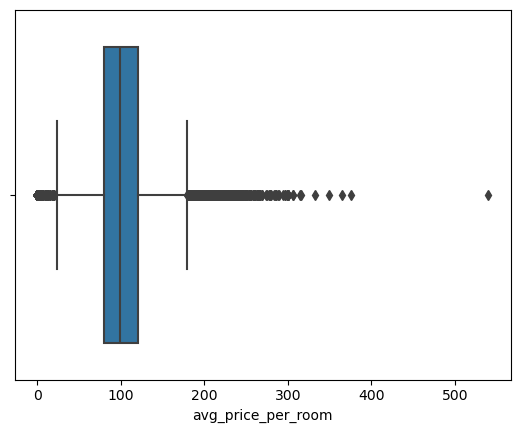

In [14]:
# Exibir boxplot para uma coluna específica
sns.boxplot(x=base_hotel['avg_price_per_room'])
plt.show()

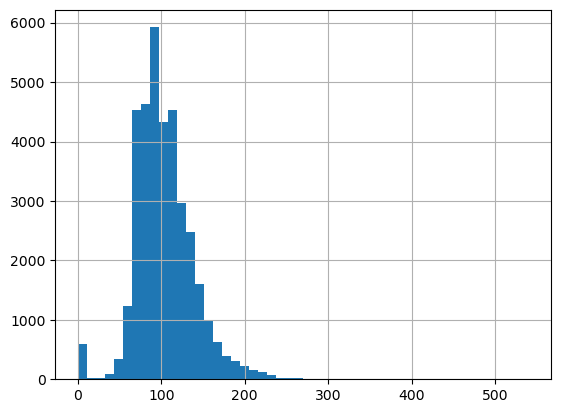

In [16]:
base_hotel['avg_price_per_room'].hist(bins=50)
plt.show()

In [249]:
# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3
        
# Carregar os dados
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')

# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Lista inicial com a coluna 'label_avg_price_per_room'
colunas = []
colunas.append('label_avg_price_per_room')

# Iterar sobre as colunas do DataFrame e adicionar à lista 'colunas'
for col in base_hotel.columns:
    colunas.append(col)

# Imprimir a lista de colunas para verificação
print(colunas)

# Lista de colunas que você deseja remover 
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 
                         'booking_status']

# Aplicar one-hot encoding nas colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'no_of_special_requests']

# Verificar se as colunas categóricas existem antes de aplicar o pd.get_dummies
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]

if colunas_categoricas_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categoricas_existentes)


['label_avg_price_per_room', 'Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'no_of_special_requests', 'booking_status', 'label_avg_price_per_room']


In [232]:
# Selecionar colunas numéricas
numerical_cols = base_hotel.select_dtypes(include=['float64', 'int64']).columns

# Identificar outliers usando IQR
for col in numerical_cols:
    Q1 = base_hotel[col].quantile(0.25)
    Q3 = base_hotel[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = base_hotel[(base_hotel[col] < lower_bound) | (base_hotel[col] > upper_bound)]
    print(f"Coluna: {col}")
    print(f"Número de outliers: {len(outliers)}")

Coluna: no_of_adults
Número de outliers: 10167
Coluna: no_of_children
Número de outliers: 2698
Coluna: no_of_weekend_nights
Número de outliers: 21
Coluna: no_of_week_nights
Número de outliers: 324
Coluna: lead_time
Número de outliers: 1331
Coluna: arrival_date
Número de outliers: 0
Coluna: repeated_guest
Número de outliers: 930
Coluna: no_of_previous_cancellations
Número de outliers: 338
Coluna: no_of_previous_bookings_not_canceled
Número de outliers: 812
Coluna: label_avg_price_per_room
Número de outliers: 0


In [267]:
# Função para criar boxplots
#def plot_boxplots(df, cols):
    for col in cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.show()

# Listar colunas numéricas
numerical_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                   'lead_time', 'repeated_guest', 'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled']

# Criar boxplots para cada coluna numérica
plot_boxplots(base_hotel, numerical_cols)

IndentationError: unexpected indent (656095873.py, line 3)

In [253]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        # Definir limites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filtrar dados
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remover outliers
base_hotel_clean = remove_outliers_iqr(base_hotel, numerical_cols)

In [255]:
# Verificar a quantidade de outliers removidos
print(f"Número total de registros antes da remoção: {len(base_hotel)}")
print(f"Número total de registros após a remoção: {len(base_hotel_clean)}")

# Verificar resumo estatístico dos dados
print("Resumo estatístico dos dados antes da remoção:")
print(base_hotel.describe())

print("Resumo estatístico dos dados após a remoção:")
print(base_hotel_clean.describe())

Número total de registros antes da remoção: 36275
Número total de registros após a remoção: 22732
Resumo estatístico dos dados antes da remoção:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

          lead_time  arrival_date  repeated_guest  \
count  36275.000000  36275.000000    36275.000000   
mean      85.232557     15.5

In [257]:
# Separar features e rótulo
X = base_hotel_clean.drop(columns=['label_avg_price_per_room'])
y = base_hotel_clean['label_avg_price_per_room']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treinamento: 15912
Tamanho do conjunto de teste: 6820


In [282]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

# Carregar os dados
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')

# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Remover colunas desnecessárias
base_hotel = base_hotel.drop(columns=colunas_para_remover, errors='ignore')

# Lista de colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'no_of_special_requests']

# Aplicar one-hot encoding nas colunas categóricas
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]

if colunas_categoricas_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categoricas_existentes)

# Selecionar colunas numéricas
numerical_cols = base_hotel.select_dtypes(include=['float64', 'int64']).columns

# Identificar outliers usando IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remover outliers
base_hotel_clean = remove_outliers_iqr(base_hotel, numerical_cols)

# Separar features e rótulo
X = base_hotel_clean.drop(columns=['label_avg_price_per_room'])
y = base_hotel_clean['label_avg_price_per_room']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar e treinar o modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Matriz de Confusão:
[[1614  397  126]
 [ 377 2215  336]
 [ 105  337 1370]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.77      0.76      0.76      2137
           2       0.75      0.76      0.75      2928
           3       0.75      0.76      0.75      1812

    accuracy                           0.76      6877
   macro avg       0.76      0.76      0.76      6877
weighted avg       0.76      0.76      0.76      6877



In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

# Carregar os dados
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')

# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Remover colunas desnecessárias
base_hotel = base_hotel.drop(columns=colunas_para_remover, errors='ignore')

# Lista de colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
                       'arrival_year', 'arrival_month', 'no_of_special_requests']

# Aplicar one-hot encoding nas colunas categóricas
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]
if colunas_categoricas_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categoricas_existentes)

# Selecionar colunas numéricas
numerical_cols = base_hotel.select_dtypes(include=['float64', 'int64']).columns

# Identificar outliers usando IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remover outliers
base_hotel_clean = remove_outliers_iqr(base_hotel, numerical_cols)

# Separar features e rótulo
X = base_hotel_clean.drop(columns=['label_avg_price_per_room'])
y = base_hotel_clean['label_avg_price_per_room']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo RandomForest
rf = RandomForestClassifier(random_state=42)

# Definir o grid de hiperparâmetros para testar
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

# Usar o modelo otimizado para fazer previsões
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\Moniza\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Melhores parâmetros encontrados: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Matriz de Confusão:
[[1596  426  115]
 [ 359 2242  327]
 [  87  334 1391]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.78      0.75      0.76      2137
           2       0.75      0.77      0.76      2928
           3       0.76      0.77      0.76      1812

    accuracy                           0.76      6877
   macro avg       0.76      0.76      0.76      6877
weighted avg       0.76      0.76      0.76      6877



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

# Carregar os dados
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')

# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                         'repeated_guest', 'no_of_previous_cancellations', 
                         'no_of_previous_bookings_not_canceled', 'booking_status']

# Remover colunas desnecessárias
base_hotel = base_hotel.drop(columns=colunas_para_remover, errors='ignore')

# Lista de colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 
                       'arrival_year', 'arrival_month', 'no_of_special_requests']

# Aplicar one-hot encoding nas colunas categóricas
colunas_categoricas_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]
if colunas_categoricas_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categoricas_existentes)

# Selecionar colunas numéricas
numerical_cols = base_hotel.select_dtypes(include=['float64', 'int64']).columns

# Remover a coluna de rótulo das colunas numéricas
numerical_cols = numerical_cols.drop('label_avg_price_per_room', errors='ignore')

# Identificar e remover outliers usando IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

base_hotel_clean = remove_outliers_iqr(base_hotel, numerical_cols)

# Separar features e rótulo
X = base_hotel_clean.drop(columns=['label_avg_price_per_room'])
y = base_hotel_clean['label_avg_price_per_room']

# Normalizar os dados numéricos para melhorar a performance dos modelos
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo RandomForest
rf = RandomForestClassifier(random_state=42)

# Definir o grid de hiperparâmetros para testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV com validação cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Executar o GridSearchCV
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros encontrados
best_params = grid_search.best_params_
print(f"Melhores parâmetros encontrados: {best_params}")

# Treinar o modelo otimizado usando os melhores parâmetros
best_model = grid_search.best_estimator_

# Avaliar o modelo com validação cruzada no conjunto de treinamento
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Acurácia média na validação cruzada: {cv_scores.mean():.4f}")

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

# Avaliar o desempenho do modelo no conjunto de teste
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

In [296]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Função para classificar o preço
def classify_price(price):
    if price <= 85:
        return 1
    elif 85 < price < 115:
        return 2
    else:
        return 3

# Carregar os dados
base_hotel = pd.read_csv(r'C:\Users\Moniza\Desktop\Hotel Reservations.csv')

# Criar a coluna de rótulo e remover a coluna original de preços
base_hotel['label_avg_price_per_room'] = base_hotel['avg_price_per_room'].apply(classify_price)
base_hotel = base_hotel.drop(columns=['avg_price_per_room'])

# Lista de colunas a serem removidas
colunas_para_remover = ['Booking_ID', 'arrival_date', 'market_segment_type', 
                        'repeated_guest', 'no_of_previous_cancellations', 
                        'no_of_previous_bookings_not_canceled', 'booking_status']

# Remover colunas desnecessárias
base_hotel = base_hotel.drop(columns=colunas_para_remover, errors='ignore')

# Lista de colunas categóricas
colunas_categoricas = ['type_of_meal_plan', 'required_car_parking_space', 
                       'room_type_reserved', 'arrival_year', 'arrival_month', 
                       'no_of_special_requests']

# Aplicar one-hot encoding nas colunas categóricas
colunas_categ_existentes = [col for col in colunas_categoricas if col in base_hotel.columns]
if colunas_categ_existentes:
    base_hotel = pd.get_dummies(base_hotel, columns=colunas_categ_existentes)

# Separar features e rótulo
X = base_hotel.drop(columns=['label_avg_price_per_room'])
y = base_hotel['label_avg_price_per_room']

# Selecionar colunas numéricas após a separação das features e do rótulo
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Normalizar os dados numéricos para melhorar a performance dos modelos
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar o modelo
rf = RandomForestClassifier(random_state=42)

# Definir o grid de parâmetros para busca
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Configurar o GridSearchCV com validação cruzada de 3 folds
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Executar a busca pelos melhores hiperparâmetros
grid_search.fit(X_train, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o desempenho do modelo com os melhores parâmetros no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Melhores parâmetros encontrados:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Matriz de Confusão:
[[2547  569  172]
 [ 513 3072  500]
 [ 149  443 2918]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.79      0.77      0.78      3288
           2       0.75      0.75      0.75      4085
           3       0.81      0.83      0.82      3510

    accuracy                           0.78     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.78      0.78      0.78     10883

